# **Práctica Extra: Clustering**

Nombre: Alfonso Murrieta Villegas

Email: alfonsomvmx@outlook.com


## **Descripción General**

El presente clustering se realizará en variables Climatológicas del sistema CLICOM del estado de Michoacán en México.

De manera general, Michoacán es uno de los estados con mayor diversidad de relieve y de clima de todo el país, esto como resultado nos da un estado con 22 mantos acuiferos  

Por ello para este análisis se contemplarán las siguientes variables registradas cada mes:*texto en cursiva*
1. Altitud y presipitación [P]
2. Temperatura obervada [TO]
3. Temperatura máxima  [TM]
4. Temperatura mínima [Tmin]




**NOTA:**
Se realizará una temperatura "promedio" para solamente contemplar una variable y no 3

##**1. Import data and create general structures**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dataMicho=pd.read_table('/content/estaciones.txt')
dataMicho.head()

,Estacion,Altitud,EneP,EneTO,EneTM,EneTMin,FebP,FebTO,FebTM,FebTMin,MarP,MarTO,MarTM,MarTMin,AbrP,AbrTO,AbrTM,AbrTMin,MayP,MayTO,MayTM,MayTMin,JunP,JunTO,JunTM,JunTMin,JulP,JulTO,JulTM,JulTMin,AgoP,AgoTO,AgoTM,AgoTMin,SepP,SepTO,SepTM,SepTMin,OctP,OctTO,OctTM,OctTMin,NovP,NovTO,NovTM,NovTMin,DicP,DicTO,DicTM,DicTMin
0,16006,360.0,28.24,19.64,33.37,14.03,1.26,20.85,34.66,15.27,1.30,23.22,36.31,18.22,2.28,24.73,38.02,20.91,17.02,25.23,38.91,22.14,124.77,24.58,36.75,21.83,186.74,23.76,34.07,20.66,179.09,23.84,33.85,20.65,189.96,23.39,33.34,19.16,70.03,23.00,34.06,18.15,13.32,21.94,34.21,16.20,7.19,20.52,33.89,14.54
1,16007,682.0,21.48,17.37,33.84,15.49,2.60,18.59,35.44,16.70,2.08,20.44,37.17,18.00,0.45,22.50,39.00,19.72,10.76,24.83,39.35,21.83,118.20,25.20,36.57,22.74,169.82,23.84,33.80,21.84,176.45,23.61,33.84,21.67,155.37,23.38,33.25,21.66,75.95,22.92,33.92,21.07,11.58,21.00,34.22,19.07,5.05,18.50,33.45,16.67
2,16014,1708.0,18.94,7.08,25.02,4.26,5.88,8.24,27.01,5.27,4.34,10.04,29.43,6.95,7.35,13.20,31.23,9.70,39.22,15.99,32.02,12.22,147.84,17.63,29.57,14.62,211.14,16.70,26.05,14.10,211.14,16.26,26.23,13.76,158.73,15.68,26.55,13.21,56.30,13.24,26.69,10.29,15.15,10.21,26.43,6.87,12.15,7.90,25.43,5.07
3,16016,1840.0,19.47,6.32,21.31,3.76,6.36,7.92,23.29,5.16,7.07,10.02,25.27,6.93,13.23,12.59,26.89,9.02,35.37,15.02,27.86,11.48,124.14,15.46,25.52,12.81,156.74,14.87,23.57,12.37,152.27,14.62,23.66,12.16,117.99,14.34,23.50,11.96,42.87,12.47,23.32,9.42,15.27,10.01,22.69,6.66,7.32,7.34,21.52,4.41
4,16017,1694.0,18.04,7.04,24.59,4.78,6.55,8.39,26.61,5.99,6.82,10.79,29.29,7.84,8.10,13.92,31.76,10.51,28.21,16.90,33.38,13.45,117.75,18.31,31.13,15.38,217.28,16.65,27.77,14.45,164.73,16.33,27.38,14.08,127.32,15.82,26.87,13.60,48.64,13.28,27.00,10.73,11.46,10.30,26.56,7.57,9.05,7.76,25.19,5.38


### **1.1 Caracterización**

In [7]:
matPears= dataMicho.corr(method='pearson')
matPears.head()

,Estacion,Altitud,EneP,EneTO,EneTM,EneTMin,FebP,FebTO,FebTM,FebTMin,MarP,MarTO,MarTM,MarTMin,AbrP,AbrTO,AbrTM,AbrTMin,MayP,MayTO,MayTM,MayTMin,JunP,JunTO,JunTM,JunTMin,JulP,JulTO,JulTM,JulTMin,AgoP,AgoTO,AgoTM,AgoTMin,SepP,SepTO,SepTM,SepTMin,OctP,OctTO,OctTM,OctTMin,NovP,NovTO,NovTM,NovTMin,DicP,DicTO,DicTM,DicTMin
Estacion,1.000000,0.084559,0.153512,-0.012115,-0.121982,-0.025363,0.031619,-0.046883,-0.140743,-0.066437,0.004244,-0.076369,-0.162976,-0.110763,-0.206750,-0.090910,-0.161246,-0.132642,-0.024854,-0.125722,-0.194278,-0.155183,0.296744,-0.135746,-0.226761,-0.149730,0.110083,-0.127035,-0.193443,-0.142949,0.148147,-0.121546,-0.188116,-0.135420,0.229604,-0.107212,-0.199936,-0.121308,0.449969,-0.057365,-0.190807,-0.072075,0.500258,-0.019232,-0.150737,-0.034892,0.091581,-0.010145,-0.123957,-0.027445
Altitud,0.084559,1.000000,-0.223758,-0.866891,-0.923311,-0.892103,0.706636,-0.874591,-0.911798,-0.899772,0.542571,-0.873606,-0.886447,-0.894805,0.693207,-0.880582,-0.868578,-0.897355,0.726196,-0.912216,-0.868262,-0.916835,-0.030588,-0.938844,-0.892931,-0.932759,0.018022,-0.946533,-0.924691,-0.934484,-0.067610,-0.947455,-0.922908,-0.939695,-0.270183,-0.947140,-0.920210,-0.937159,-0.225607,-0.933838,-0.918283,-0.938487,0.018625,-0.897219,-0.919380,-0.912664,0.179308,-0.865494,-0.921449,-0.897525
EneP,0.153512,-0.223758,1.000000,0.305049,0.121681,0.318525,-0.096754,0.253870,0.095068,0.265523,-0.185362,0.214282,0.051012,0.218073,-0.274405,0.168143,0.026843,0.169263,-0.099086,0.139001,0.000358,0.133616,0.304567,0.182326,0.029789,0.173972,0.134443,0.219202,0.117715,0.193850,0.261217,0.225766,0.123726,0.198741,0.412784,0.252207,0.121223,0.228381,0.670725,0.298586,0.127656,0.291005,0.587359,0.343574,0.131393,0.338291,0.387816,0.341785,0.134050,0.351848
EneTO,-0.012115,-0.866891,0.305049,1.000000,0.848863,0.955540,-0.653282,0.994565,0.830430,0.950097,-0.527459,0.977270,0.798456,0.934721,-0.704165,0.952139,0.785362,0.914273,-0.606706,0.919684,0.765954,0.881231,0.185785,0.878256,0.774839,0.829397,0.155787,0.888122,0.815946,0.819736,0.197829,0.904134,0.817254,0.834615,0.390980,0.918698,0.818909,0.843683,0.328376,0.961917,0.824789,0.900997,0.012418,0.989193,0.835817,0.936401,-0.330628,0.996030,0.854993,0.949382
EneTM,-0.121982,-0.923311,0.121681,0.848863,1.000000,0.869835,-0.711343,0.869009,0.996623,0.890795,-0.499231,0.882160,0.985700,0.899130,-0.661330,0.899512,0.976405,0.913874,-0.659960,0.931558,0.969489,0.933184,0.054458,0.951254,0.971013,0.937442,0.032551,0.943242,0.978638,0.926976,0.052070,0.948401,0.976335,0.935108,0.238848,0.950172,0.974881,0.935610,0.185341,0.924619,0.984438,0.925446,-0.132871,0.875266,0.994414,0.892031,-0.340388,0.847769,0.997897,0.872643


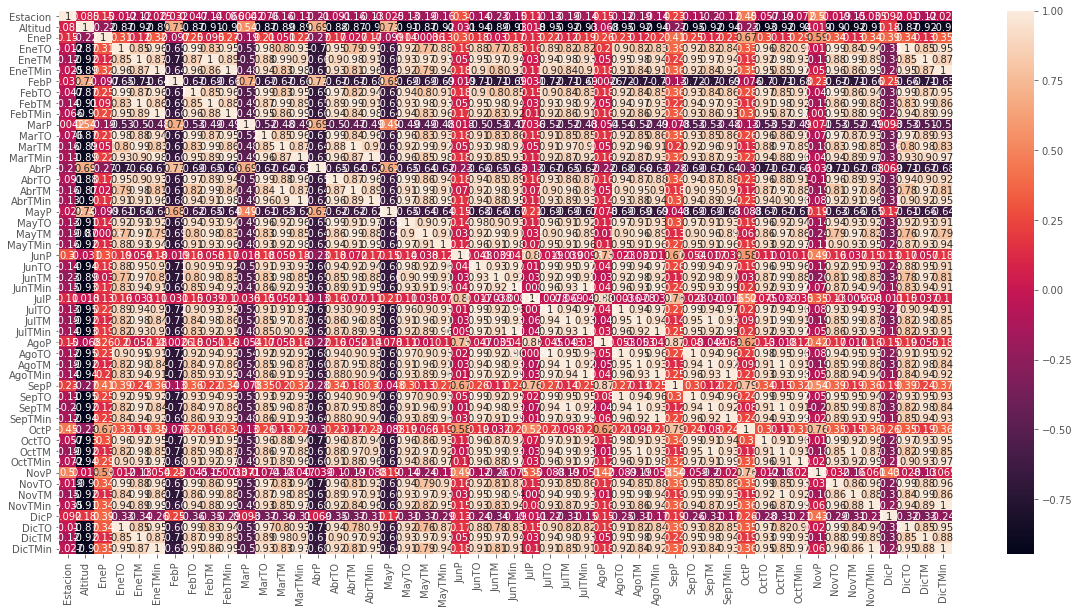

In [ ]:
plt.figure(figsize = (20,10))
sb.heatmap(matPears, annot = True)  

**Apartado de selección de variables**

Con base a la matriz previa se realizará principalmente el análisis mediante:
1. Presipitación - Temperatura promediomensual
2. Altitud

In [ ]:
#el método ILOC se basa en la ubicación de números enteros para la selección por posición.
auxData = dataMicho.iloc[:, [1, 2, 3, 6, 7, 10,11,14,15,18,19,22,23,26,27,30,31,34,35,38,39,42,43,46,47]].values  
auxData

array([[ 360.  ,   28.24,   19.64, ...,   21.94,    7.19,   20.52],
       [ 682.  ,   21.48,   17.37, ...,   21.  ,    5.05,   18.5 ],
       [1708.  ,   18.94,    7.08, ...,   10.21,   12.15,    7.9 ],
       ...,
       [1720.  ,   33.76,   10.12, ...,   13.05,    8.56,   11.15],
       [  45.  ,   42.81,   18.46, ...,   22.24,   12.43,   19.86],
       [1910.  ,   33.05,    7.35, ...,   10.43,   13.83,    8.13]])

## **2. CLUSTERING JERARQUICO**

Primero importaremos lo necesario para crear el árbol y posteriormente haremos el clustering jerarquico



In [ ]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

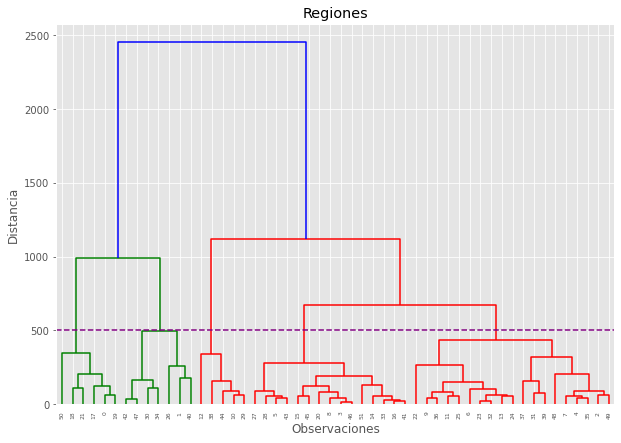

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Regiones")
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
Arbol = shc.dendrogram(shc.linkage(auxData, method='complete'))
plt.axhline(y=500, color='purple', linestyle='--')

**NOTAS:**

Lo primero a observar es que podemos categorizar en 5 diferentes climas
1. Templado húmedo
2. Templado semi-húmedo
3. Cálido húmedo
4. Cálido sem-húmedo 
5. Seco

Podría también hacerse con 6 donde el seco se dividiría en húmedo y semi-húmedo

In [ ]:
MJerarquico = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
MJerarquico.fit_predict(auxData)
MJerarquico.labels_

array([3, 0, 1, 4, 1, 4, 1, 1, 4, 1, 2, 1, 2, 1, 4, 4, 4, 3, 3, 3, 4, 3,
       1, 1, 1, 1, 0, 4, 4, 2, 0, 1, 1, 4, 0, 1, 1, 1, 2, 1, 0, 4, 0, 4,
       2, 4, 4, 0, 1, 1, 3, 4])

In [ ]:
dataMicho['cluster']=MJerarquico.labels_
dataMicho.head()

,Estacion,Altitud,EneP,EneTO,EneTM,EneTMin,FebP,FebTO,FebTM,FebTMin,MarP,MarTO,MarTM,MarTMin,AbrP,AbrTO,AbrTM,AbrTMin,MayP,MayTO,MayTM,MayTMin,JunP,JunTO,JunTM,JunTMin,JulP,JulTO,JulTM,JulTMin,AgoP,AgoTO,AgoTM,AgoTMin,SepP,SepTO,SepTM,SepTMin,OctP,OctTO,OctTM,OctTMin,NovP,NovTO,NovTM,NovTMin,DicP,DicTO,DicTM,DicTMin,cluster
0,16006,360.0,28.24,19.64,33.37,14.03,1.26,20.85,34.66,15.27,1.30,23.22,36.31,18.22,2.28,24.73,38.02,20.91,17.02,25.23,38.91,22.14,124.77,24.58,36.75,21.83,186.74,23.76,34.07,20.66,179.09,23.84,33.85,20.65,189.96,23.39,33.34,19.16,70.03,23.00,34.06,18.15,13.32,21.94,34.21,16.20,7.19,20.52,33.89,14.54,3
1,16007,682.0,21.48,17.37,33.84,15.49,2.60,18.59,35.44,16.70,2.08,20.44,37.17,18.00,0.45,22.50,39.00,19.72,10.76,24.83,39.35,21.83,118.20,25.20,36.57,22.74,169.82,23.84,33.80,21.84,176.45,23.61,33.84,21.67,155.37,23.38,33.25,21.66,75.95,22.92,33.92,21.07,11.58,21.00,34.22,19.07,5.05,18.50,33.45,16.67,0
2,16014,1708.0,18.94,7.08,25.02,4.26,5.88,8.24,27.01,5.27,4.34,10.04,29.43,6.95,7.35,13.20,31.23,9.70,39.22,15.99,32.02,12.22,147.84,17.63,29.57,14.62,211.14,16.70,26.05,14.10,211.14,16.26,26.23,13.76,158.73,15.68,26.55,13.21,56.30,13.24,26.69,10.29,15.15,10.21,26.43,6.87,12.15,7.90,25.43,5.07,1
3,16016,1840.0,19.47,6.32,21.31,3.76,6.36,7.92,23.29,5.16,7.07,10.02,25.27,6.93,13.23,12.59,26.89,9.02,35.37,15.02,27.86,11.48,124.14,15.46,25.52,12.81,156.74,14.87,23.57,12.37,152.27,14.62,23.66,12.16,117.99,14.34,23.50,11.96,42.87,12.47,23.32,9.42,15.27,10.01,22.69,6.66,7.32,7.34,21.52,4.41,4
4,16017,1694.0,18.04,7.04,24.59,4.78,6.55,8.39,26.61,5.99,6.82,10.79,29.29,7.84,8.10,13.92,31.76,10.51,28.21,16.90,33.38,13.45,117.75,18.31,31.13,15.38,217.28,16.65,27.77,14.45,164.73,16.33,27.38,14.08,127.32,15.82,26.87,13.60,48.64,13.28,27.00,10.73,11.46,10.30,26.56,7.57,9.05,7.76,25.19,5.38,1


In [ ]:
dataMicho.groupby(['cluster'])['cluster'].count()

cluster
0     7
1    19
2     5
3     6
4    15
Name: cluster, dtype: int64

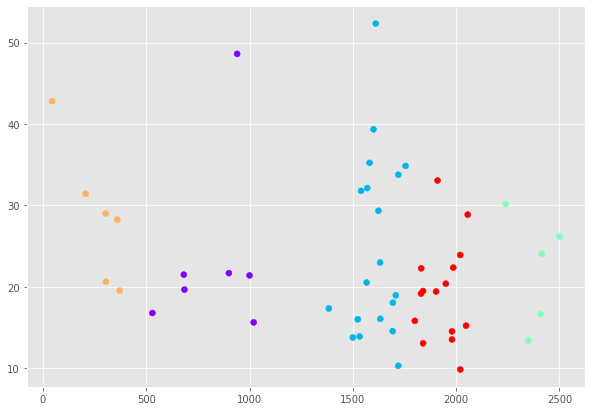

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(auxData[:,0],auxData[:,1],c=MJerarquico.labels_,cmap='rainbow')
plt.show()

In [ ]:
auxData

array([[ 360.  ,   28.24,   19.64, ...,   21.94,    7.19,   20.52],
       [ 682.  ,   21.48,   17.37, ...,   21.  ,    5.05,   18.5 ],
       [1708.  ,   18.94,    7.08, ...,   10.21,   12.15,    7.9 ],
       ...,
       [1720.  ,   33.76,   10.12, ...,   13.05,    8.56,   11.15],
       [  45.  ,   42.81,   18.46, ...,   22.24,   12.43,   19.86],
       [1910.  ,   33.05,    7.35, ...,   10.43,   13.83,    8.13]])

In [ ]:
centroides=dataMicho.groupby(['cluster'])['Altitud','EneP', 'EneTO','FebP','FebTO','MarP','MarTO','AbrP','AbrTO','MayP','MayTO','JunP','JunTO','JulP','JulTO','AgoP','AgoTO','SepP','SepTO','OctP','OctTO','NovP','NovTO','DicP','DicTO'].mean()

centroides

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Altitud,EneP,EneTO,FebP,FebTO,MarP,MarTO,AbrP,AbrTO,MayP,MayTO,JunP,JunTO,JulP,JulTO,AgoP,AgoTO,SepP,SepTO,OctP,OctTO,NovP,NovTO,DicP,DicTO
cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,822.428571,23.598571,14.824286,2.407143,15.810000,3.497143,17.511429,1.272857,19.977143,23.890000,22.180000,166.568571,22.697143,231.022857,21.448571,217.867143,21.168571,189.454286,20.905714,84.798571,20.100000,17.708571,18.111429,5.065714,15.987143
1,1609.947368,24.792632,8.945263,5.130000,10.011053,4.804737,11.960000,6.873158,14.658947,34.743158,17.036842,162.063158,17.885789,209.972632,16.872632,192.779474,16.572105,149.774211,16.208947,60.382632,14.396316,15.674211,12.001579,8.864737,9.960000
2,2382.800000,22.072000,6.100000,6.750000,7.224000,7.496000,9.228000,16.554000,11.802000,44.580000,13.572000,147.768000,14.272000,207.916000,13.482000,192.216000,13.260000,156.408000,13.014000,68.280000,11.100000,17.280000,8.844000,7.262000,6.908000
3,265.500000,28.603333,18.261667,2.286667,19.315000,1.838333,20.956667,1.880000,23.416667,16.535000,25.651667,140.830000,25.816667,173.218333,24.355000,173.331667,24.116667,163.575000,23.721667,68.485000,23.035000,14.705000,21.365000,7.130000,19.250000
4,1932.933333,19.384667,6.747333,6.154000,7.734667,6.110667,9.788000,10.928000,12.543333,37.718000,14.730667,143.812000,15.640000,184.284000,14.757333,177.511333,14.590000,138.616000,14.157333,57.716667,12.285333,15.780000,9.648667,7.905333,7.630667


Obteniendo los centroides de la precipitación y de la temperatura

In [ ]:
pres=dataMicho.groupby(['cluster'])['EneP','FebP','MarP','AbrP','MayP','JunP','JulP','AgoP','SepP','OctP','NovP','DicP'].mean()
tem=dataMicho.groupby(['cluster'])['EneTO','FebTO','MarTO','AbrTO','MayTO','JunTO','JulTO','AgoTO','SepTO','OctTO','NovTO','DicTO'].mean()

# Recorriendo cada uno de los clusters en cada variable

auxVar=0
print("Precipitación Mensual")
for i in range(0,5):
  for k in pres.keys():
    auxVar+=pres.get(k)[i]
  auxVar=auxVar/12
  print('Cluster '+str(i)+': '+str(auxVar))
  auxVar=0


auxVar2=0
print("\nPromedio de temperatura durante el año")
for i in range(0,5):
  for k in tem.keys():
    auxVar2+=tem.get(k)[i]
  auxVar2=auxVar2/12
  print('Cluster '+str(i)+': '+str(auxVar2))
  auxVar2=0


Precipitación Mensual
Cluster 0: 80.59595238095238
Cluster 1: 72.98789473684211
Cluster 2: 74.54849999999999
Cluster 3: 66.03486111111111
Cluster 4: 67.16005555555556

Promedio de temperatura durante el año
Cluster 0: 19.226785714285715
Cluster 1: 13.87578947368421
Cluster 2: 10.733833333333331
Cluster 3: 22.43847222222222
Cluster 4: 11.687777777777775


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


### **Conclusiones y observaciones**

De las distintas regiones o zonas obtenidas y analizadas mediante el clustering particional podemos concluir que:

**Región 0**
1. Cuenta con un total de  7 lugares.
2. Su altitud promedio es de 822.42 [m]
3. Su precipitación mensual de 80.59 [ml/cm2]
4. Su temperatura promedio anual es de 19.22 [°C]

**Región 1**
1. Cuenta con un total de 19 lugares.
2. Su altitud promedio es de 1609.97 [m]
3. Su precipitación mensual de 72.98 [ml/cm2]
4. Su temperatura promedio anual es de 13.8757 [°C]

**Región 2**
1. Cuenta con un total de 6 lugares.
2. Su altitud promedio es de 2382.8 [m]
3. Su precipitación mensual de 74.54 [ml/cm2]
4. Su temperatura promedio anual es de 10.73 [°C]

**Región 3**
1. Cuenta con un total de 19 lugares.
2. Su altitud promedio es de 265.5 [m]
3. Su precipitación mensual de 66.03 [ml/cm2]
4. Su temperatura promedio anual es de 22.43 [°C]

**Región 4**
1. Cuenta con un total de 15 lugares.
2. Su altitud promedio es de 1932.93 [m]
3. Su precipitación mensual de 67.16 [ml/cm2]
4. Su temperatura promedio anual es de 11.68 [°C]


**NOTA** 
Podemos observar que mientras mayor altitud tenga una región comúnmente tenemos una menor temperatura promedio al año, lo cual definitivamente puede ser un buen factor a considerar en un estado de alto grado y dependencia agrícola como es Michoacán

## **3. CLUSTERING PARTICIONAL**

En primera instancia volvemos a importar las bibliotecas necesarias para hacer el clustering particional y además, usaremos el método del codo para poder determinar la cantidad o punto de inflexión dentro de los cluster en nuestros datos

#### 3.1 Método del Codo para los clusters


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

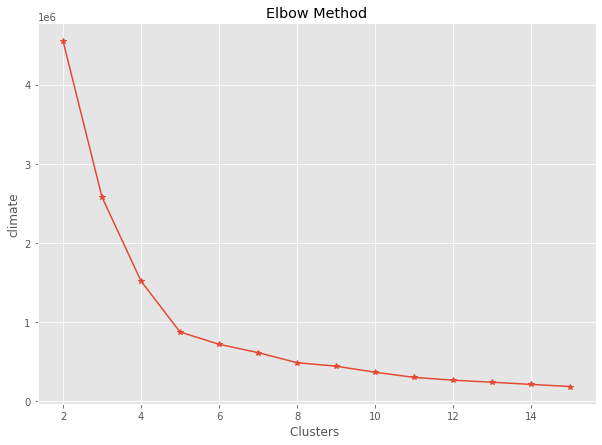

In [ ]:
climate=[]
for i in range(2,16):
  km=KMeans(n_clusters=i,random_state=0)
  km.fit(auxData)
  climate.append(km.inertia_)

plt.figure(figsize=(10,7))
plt.plot(range(2,16),climate,marker='*')
plt.xlabel('Clusters ')
plt.ylabel('climate')
plt.title('Elbow Method')
plt.show()

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator
k1=KneeLocator(range(2,16),climate,curve="convex",direction="decreasing")
k1.elbow

5

**NOTA:**
Se importó kneed que es una biblioteca la cuál a través del uso del método o función "KneeLocator" que hace uso de una interpolación poligonal obtiene específicamente que valor es el mejor para el número de cluster. 

En este caso nos da 5 además de que en nuestra gráfica previa observamos de forma visual que es el valor con mayor diferencia de pendiente respecto a sus valores cercanos

#### 3.2 Clustering particional


In [ ]:
MParticional = KMeans(n_clusters=5, random_state=0).fit(auxData)
MParticional.predict(auxData)
MParticional.labels_

array([1, 3, 4, 2, 4, 2, 4, 4, 2, 4, 0, 4, 0, 4, 2, 2, 2, 1, 1, 1, 2, 1,
       4, 4, 4, 4, 3, 2, 2, 0, 3, 4, 4, 2, 3, 4, 4, 4, 0, 4, 1, 2, 3, 2,
       0, 2, 2, 3, 4, 4, 1, 2], dtype=int32)

In [ ]:
dataMicho['clusterP']=MParticional.labels_
dataMicho.head()

,Estacion,Altitud,EneP,EneTO,EneTM,EneTMin,FebP,FebTO,FebTM,FebTMin,MarP,MarTO,MarTM,MarTMin,AbrP,AbrTO,AbrTM,AbrTMin,MayP,MayTO,MayTM,MayTMin,JunP,JunTO,JunTM,JunTMin,JulP,JulTO,JulTM,JulTMin,AgoP,AgoTO,AgoTM,AgoTMin,SepP,SepTO,SepTM,SepTMin,OctP,OctTO,OctTM,OctTMin,NovP,NovTO,NovTM,NovTMin,DicP,DicTO,DicTM,DicTMin,cluster,clusterP
0,16006,360.0,28.24,19.64,33.37,14.03,1.26,20.85,34.66,15.27,1.30,23.22,36.31,18.22,2.28,24.73,38.02,20.91,17.02,25.23,38.91,22.14,124.77,24.58,36.75,21.83,186.74,23.76,34.07,20.66,179.09,23.84,33.85,20.65,189.96,23.39,33.34,19.16,70.03,23.00,34.06,18.15,13.32,21.94,34.21,16.20,7.19,20.52,33.89,14.54,3,1
1,16007,682.0,21.48,17.37,33.84,15.49,2.60,18.59,35.44,16.70,2.08,20.44,37.17,18.00,0.45,22.50,39.00,19.72,10.76,24.83,39.35,21.83,118.20,25.20,36.57,22.74,169.82,23.84,33.80,21.84,176.45,23.61,33.84,21.67,155.37,23.38,33.25,21.66,75.95,22.92,33.92,21.07,11.58,21.00,34.22,19.07,5.05,18.50,33.45,16.67,0,3
2,16014,1708.0,18.94,7.08,25.02,4.26,5.88,8.24,27.01,5.27,4.34,10.04,29.43,6.95,7.35,13.20,31.23,9.70,39.22,15.99,32.02,12.22,147.84,17.63,29.57,14.62,211.14,16.70,26.05,14.10,211.14,16.26,26.23,13.76,158.73,15.68,26.55,13.21,56.30,13.24,26.69,10.29,15.15,10.21,26.43,6.87,12.15,7.90,25.43,5.07,1,4
3,16016,1840.0,19.47,6.32,21.31,3.76,6.36,7.92,23.29,5.16,7.07,10.02,25.27,6.93,13.23,12.59,26.89,9.02,35.37,15.02,27.86,11.48,124.14,15.46,25.52,12.81,156.74,14.87,23.57,12.37,152.27,14.62,23.66,12.16,117.99,14.34,23.50,11.96,42.87,12.47,23.32,9.42,15.27,10.01,22.69,6.66,7.32,7.34,21.52,4.41,4,2
4,16017,1694.0,18.04,7.04,24.59,4.78,6.55,8.39,26.61,5.99,6.82,10.79,29.29,7.84,8.10,13.92,31.76,10.51,28.21,16.90,33.38,13.45,117.75,18.31,31.13,15.38,217.28,16.65,27.77,14.45,164.73,16.33,27.38,14.08,127.32,15.82,26.87,13.60,48.64,13.28,27.00,10.73,11.46,10.30,26.56,7.57,9.05,7.76,25.19,5.38,1,4


In [ ]:
dataMicho.groupby(['clusterP'])['clusterP'].count()

clusterP
0     5
1     7
2    15
3     6
4    19
Name: clusterP, dtype: int64

In [ ]:
CentroidesP=MParticional.cluster_centers_
datos=pd.DataFrame(CentroidesP.round(4))
datos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,2382.8000,22.0720,6.1000,6.7500,7.2240,7.4960,9.2280,16.5540,11.8020,44.5800,13.5720,147.7680,14.2720,207.9160,13.4820,192.2160,13.2600,156.4080,13.0140,68.2800,11.1000,17.2800,8.8440,7.2620,6.9080
1,303.2857,26.9129,17.6857,2.1757,18.8929,2.2129,20.6671,1.8129,23.2429,17.9729,25.5229,145.6114,25.6786,179.8057,24.1314,177.4529,23.8943,166.5814,23.5386,69.9014,22.7900,14.7386,20.8814,6.8686,18.6814
2,1932.9333,19.3847,6.7473,6.1540,7.7347,6.1107,9.7880,10.9280,12.5433,37.7180,14.7307,143.8120,15.6400,184.2840,14.7573,177.5113,14.5900,138.6160,14.1573,57.7167,12.2853,15.7800,9.6487,7.9053,7.6307
3,871.1667,24.7367,14.9233,2.5567,15.7183,3.3367,17.2750,1.2500,19.6067,23.4383,21.7517,165.2800,22.3383,232.9717,21.2250,220.4817,20.9367,190.2600,20.6500,85.8650,19.8967,18.1700,18.1333,5.0267,16.1067
4,1609.9474,24.7926,8.9453,5.1300,10.0111,4.8047,11.9600,6.8732,14.6589,34.7432,17.0368,162.0632,17.8858,209.9726,16.8726,192.7795,16.5721,149.7742,16.2089,60.3826,14.3963,15.6742,12.0016,8.8647,9.9600


Con base a los centroides obtenidos, se hará una gráfica 3D para la mejor aprecisación de la dispersión de los datos además de la ubicación de los K-means dentro de nuestro dataset

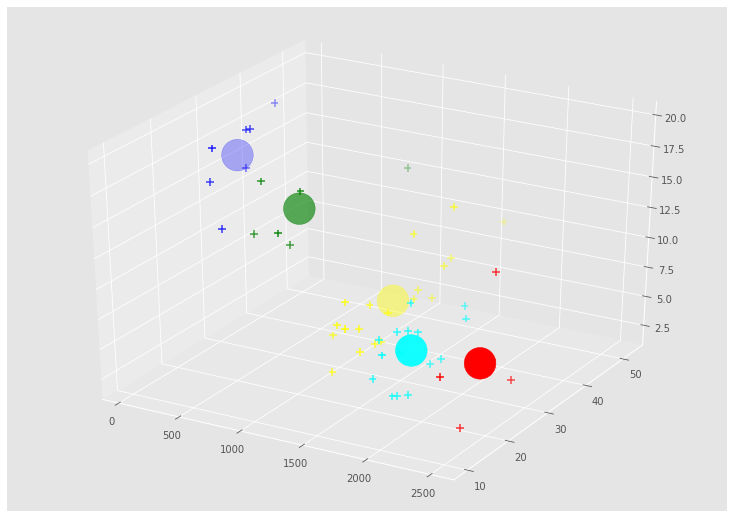

In [ ]:
# Gráfica de los elementos y los centros de los clusters
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('ggplot')
colores=['red', 'blue', 'cyan', 'green', 'yellow']
asignar=[]
for row in MParticional.labels_:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter (auxData[:, 0], auxData[:, 1], auxData[:, 2], marker='+', c=asignar, s=60)
ax.scatter(CentroidesP[:, 0], CentroidesP[:, 1], CentroidesP[:, 2], marker='o', c=colores, s=1000)
plt.show()

In [ ]:
#Promedios Precipitacion y temperatura
press2=dataMicho.groupby(['clusterP'])['EneP','FebP','MarP','AbrP','MayP','JunP','JulP','AgoP','SepP','OctP','NovP','DicP'].mean()
temp2=dataMicho.groupby(['clusterP'])['EneTO','FebTO','MarTO','AbrTO','MayTO','JunTO','JulTO','AgoTO','SepTO','OctTO','NovTO','DicTO'].mean()

datosAux=0
print("Precipitación Mensual")
for i in range(0,5):
  for k in press2.keys():
    datosAux+=press2.get(k)[i]
  datosAux=datosAux/12
  print('Cluster '+str(i)+': '+str(datosAux))
  datosAux=0

datosAux=0
print("\nPromedio de temperatura durante el año")
for i in range(0,5):
  for k in temp2.keys():
    datosAux+=temp2.get(k)[i]
  datosAux=datosAux/12
  print('Cluster '+str(i)+': '+str(datosAux))
  datosAux=0

Precipitación Mensual
Cluster 0: 74.54849999999999
Cluster 1: 67.67059523809523
Cluster 2: 67.16005555555556
Cluster 3: 81.11444444444443
Cluster 4: 72.98789473684211

Promedio de temperatura durante el año
Cluster 0: 10.733833333333331
Cluster 1: 22.133928571428566
Cluster 2: 11.687777777777775
Cluster 3: 19.046805555555554
Cluster 4: 13.87578947368421


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### **Conclusiones y observaciones**

**Región 0**
1. Cuenta con un total de 5 lugares.
2. Su altitud promedio es de 2382.8 [m]
3. Su precipitación mensual de 74.54 [ml/cm2]
4. Su temperatura promedio anual es de 10.73 [°C]

**Región 1**
1. Cuenta con un total de 7 lugares.
2. Su altitud promedio es de 303.2857 [m]
3. Su precipitación mensual de 67.67 [ml/cm2]
4. Su temperatura promedio anual es de 22.13 [°C]

**Región 2**
1. Cuenta con un total de 15 lugares.
2. Su altitud promedio es de 1932.933 [m]
3. Su precipitación mensual de 67.16 [ml/cm2]
4. Su temperatura promedio anual es de 11.04 [°C]

**Región 3**
1. Cuenta con un total de 6 lugares.
2. Su altitud promedio es de 871.1667 [m]
3. Su precipitación mensual de 81.114 [ml/cm2]
4. Su temperatura promedio anual es de 19.04 [°C]

**Región 4**
1. Cuenta con un total de 19 lugares.
2. Su altitud promedio es de 1609.94 [m]
3. Su precipitación mensual de 72.98 [ml/cm2]
4. Su temperatura promedio anual es de 13.87 [°C]

**NOTA**

Al igual que en el clustering particional, podemos observar ciertos patrones como es el caso nuevamente de que mientras mayor sea la altitud es menor la temperatura y esto sobre todo se debe a factores como la presión atmosférica además probablemente del relieve en el que se encuentran zonas de gran altitud